In [1]:
import math, copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import PrecisionRecallDisplay, f1_score, mean_absolute_error, mean_squared_error

my_ID = 400132290
np.random.seed(my_ID)
np.set_printoptions(precision=2)# reduced display precision on numpy arrays

In [2]:
data = pd.read_csv(r"C:\Users\zhang\Downloads\BostonHousing.csv")
X = data.iloc[:, :-1]
y = data.iloc[:,-1].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=my_ID)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (404, 13), X Type:<class 'numpy.ndarray'>)
y Shape: (404,), y Type:<class 'numpy.ndarray'>)


data = fetch_california_housing()
x_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data = data.target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=my_ID)

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
#print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
#print(y_train)

The cv error for k = 1 was: 18.864814814814814
The test error  for k = 1 was: 24.37509803921569
The cv error for k = 2 was: 17.90541975308642
The test error  for k = 2 was: 19.325539215686273
The cv error for k = 3 was: 18.323909602194785
The test error  for k = 3 was: 21.463910675381264
The cv error for k = 4 was: 18.97377511574074
The test error  for k = 4 was: 22.254705882352948
The cv error for k = 5 was: 21.301550691358024
The test error  for k = 5 was: 22.317996078431374
The cv error for k = 6 was: 20.743665655006858
The test error  for k = 6 was: 22.937137799564265
The cv error for k = 7 was: 21.457321743512217
The test error  for k = 7 was: 23.14191076430572
The cv error for k = 8 was: 21.277914718364194
The test error  for k = 8 was: 23.544160539215678
The cv error for k = 9 was: 20.862844314891024
The test error  for k = 9 was: 23.909742193173564
The cv error for k = 10 was: 21.347731324074072
The test error  for k = 10 was: 25.209116666666663
The cv error for k = 11 was: 22.

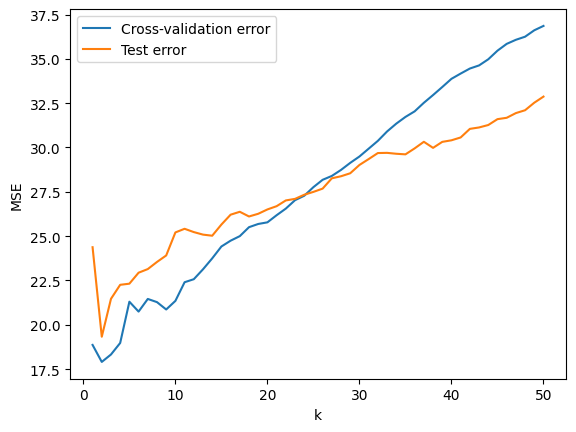

In [3]:
def predict_knn(k, x_train_mat, x_test_mat, y_train_mat):
    predictions = []

    # For each row in the test set, calculate the distance between it and each row in the training set,
    # and pick the K rows with the smallest distances between them and the test row
    for x in x_test_mat:
        distances = np.linalg.norm(x_train_mat - x, axis=1)
        neighbours = np.argsort(distances, kind='stable')[0:k]
        classes = list(y_train_mat[neighbours])
        predictions.append(max(set(classes), key=classes.count))

    return predictions


def perform_cross_validation(k, kf, x_train, y_train):
    cross_valid_score = 0.0

    # Run through all num K_FOLDS cross-validation
    for train, test in kf.split(x_train):
        x_train_mat, x_test_mat = x_train[train], x_train[test]
        y_train_mat, y_test_mat = y_train[train], y_train[test]

        predictions = predict_knn(k, x_train_mat, x_test_mat, y_train_mat)

        cross_valid_score += mean_squared_error(predictions, y_test_mat)

    # Average final cross-validation error
    return cross_valid_score / kf.n_splits


def main():
    K = 50
    kf = KFold(n_splits= K)
    """k-nearest neighbour classifier"""
    cv_scores = []
    test_scores = []
    for k in range(1, K+1):  # number of neighbours
        # # My implementation
        # cv_score = perform_cross_validation(k, kf, x_train, y_train)
        # #cv_scores.append(cv_score)
        # print(f"For k={k}, the cross-validation error was: {cv_score}")

        # Scikit learn implementation
        knn = KNeighborsRegressor(n_neighbors=k)
        skl_cv_score = -cross_val_score(knn, x_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
        cv_scores.append(skl_cv_score)
        print(f"The cv error for k = {k} was: {skl_cv_score}")
        
        
        knn_test = KNeighborsRegressor(n_neighbors=k)
        knn_test.fit(x_train, y_train)

        predictions = knn_test.predict(x_test)

        misclass_rate = mean_squared_error(y_test, predictions)
        test_scores.append(misclass_rate)
        print(f"The test error  for k = {k} was: {misclass_rate}")

    print()
    best_k = np.argmin(cv_scores) + 1
    print(f"The best model was at k={best_k}")

    # My implementation
    # predictions = predict_knn(best_k, x_train, x_test, y_train)

    # best_misclass_rate = mean_squared_error(predictions, y_test)
    # print(f"The test error for my implementation is: {best_misclass_rate}")

    # Scikit learn implementation
    knn = KNeighborsRegressor(n_neighbors=best_k)
    knn.fit(x_train, y_train)

    predictions = knn.predict(x_test)

    best_misclass_rate = mean_squared_error(y_test, predictions)
    print(f"The test error for the sklearn implementation is: {best_misclass_rate}")
    

    plt.plot(range(1, K + 1), cv_scores, label="Cross-validation error")
    plt.plot(range(1, K + 1), test_scores, label="Test error")
    plt.xlabel("k")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
# from tqdm import tqdm

# # Set the seed for the randomization
np.random.seed(1234)  # Use the last 4 digits of your student ID

# # Load the California Housing dataset
# california_housing = fetch_california_housing()
# X = california_housing.data
# y = california_housing.target

# # Split the data into a training set and a test set (80% - 20% split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=my_ID)

# Perform k-NN regression and cross-validation
best_k = None
best_score = float('inf')

ind = len(x_train)  # Calculate the length of the training set

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = -cross_val_score(knn, x_train, y_train, cv=2, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print(f"The sklearn cv error was: {mean_score}")
    if mean_score < best_score:
        best_score = mean_score
        best_k = k

# Train the best k-NN model on the entire training set
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(x_train, y_train)

# Evaluate the best model on the test set
y_pred = best_knn.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best k: {best_k}")
print(f"Mean Squared Error on Test Set: {mse}")